# CSCI 7350 Final Project: Give Me Some Credit
# Xi Chen & Ning Zhang

## Read Data

Load the data from csv file. It contains 15,000 records. Each record has these values:

**Response Variable：**
* Default or Not      

**Predictor Variables:**
1. Balance divided by credit limit.    
2. Age.                  
3. Number of times that 30-59 days past due.   
4. Debt divied by monthly income.                           
5. Monthly income.                 
6. Number of open credit lines and loans.        
7. Number of times that 90 and more days past due.              
8. Number of real estate loans.            
9. Number of times that 60-89 days past due.    
10. Number of dependents.

The goal of this project is to build a credit scoring model by predicting probability of credit default in the future.

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df=pd.read_csv('cs-training.csv', sep=',', index_col=0)
#print list(df.columns.values)
#print df.info() # basic information
#print data.describe() # basic statistics
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
df.tail()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


## Preprocessing: 
### 1. Check the data distribution
#### 1.1. Q-Q plot

The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution.

In [4]:
from scipy.stats import probplot
def qq_plot(x):
    probplot(x, dist='norm', plot=plt)

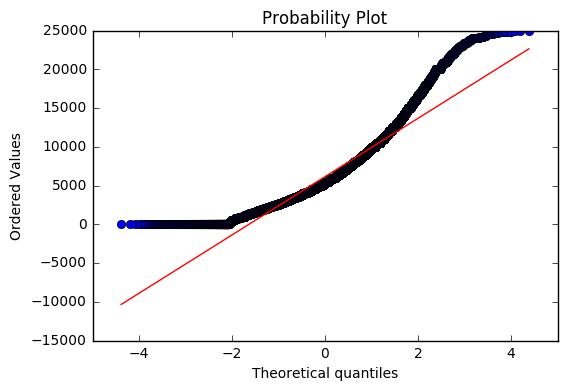

In [5]:
x=df['MonthlyIncome']
x = x.dropna()
qq_plot(x[x<x.quantile(0.99)])

#### 1.2. KDE plot
In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

In [6]:
from scipy.stats.kde import gaussian_kde
def kde_plot(x):   
    kde = gaussian_kde(x)
    positions = np.linspace(x.min(), x.max())
    smoothed = kde(positions)
    plt.plot(positions, smoothed)
    
def kde_values(x):   
    kde = gaussian_kde(x)
    positions = np.linspace(x.min(), x.max())
    smoothed = kde(positions)
    return positions, smoothed

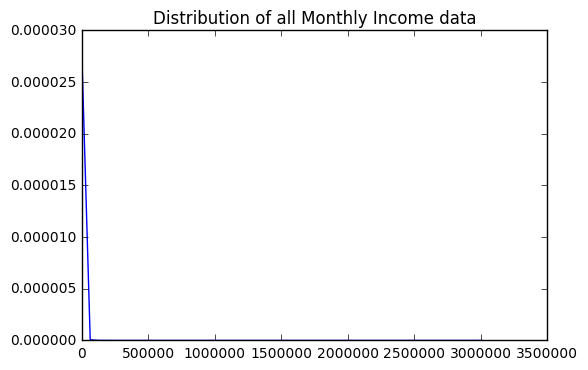

In [7]:
x=df['MonthlyIncome']
x=x.dropna()
kde_plot(x)
plt.title("Distribution of all Monthly Income data")
plt.show()

## Preprocessing: 
### 2. Remove the outliers
Set all values that are greater then 99 percentile be NaN.

In [8]:
print x.quantile(0.99), x.quantile(0.01)

25000.0 0.0


<function matplotlib.pyplot.show>

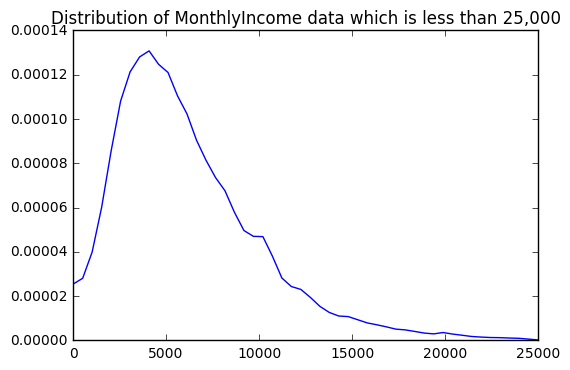

In [9]:
kde_plot(x[x<25000])
plt.title("Distribution of MonthlyIncome data which is less than 25,000")
plt.show

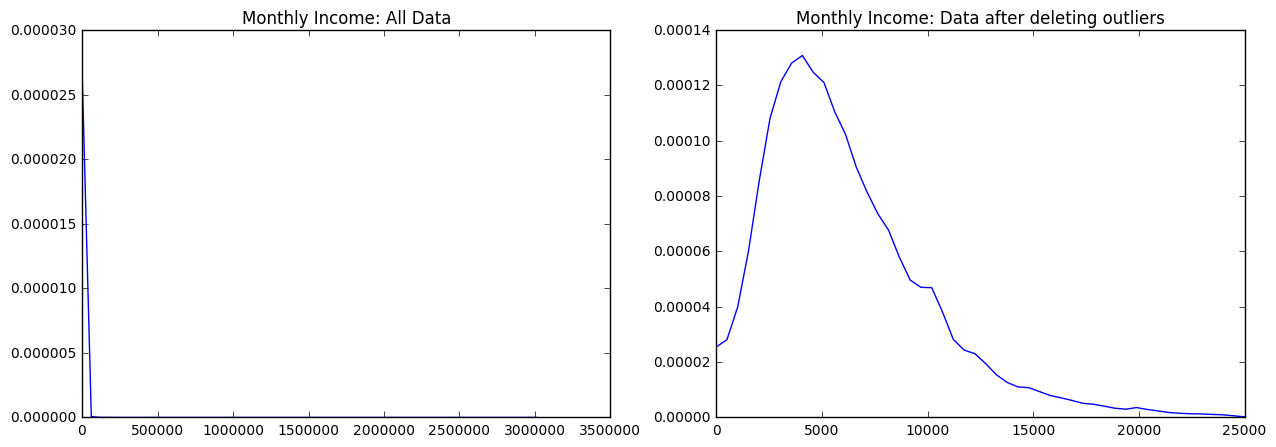

In [10]:
x=df['MonthlyIncome']
x=x.dropna()

plt.rcParams['figure.figsize'] = (15,5)
f, (ax1, ax2) = plt.subplots(1, 2)
positions, smoothed = kde_values(x)
ax1.plot(positions, smoothed)
ax1.set_title('Monthly Income: All Data')
positions, smoothed = kde_values(x[x<x.quantile(0.99)])
ax2.plot(positions, smoothed)
ax2.set_title('Monthly Income: Data after deleting outliers')
plt.show()

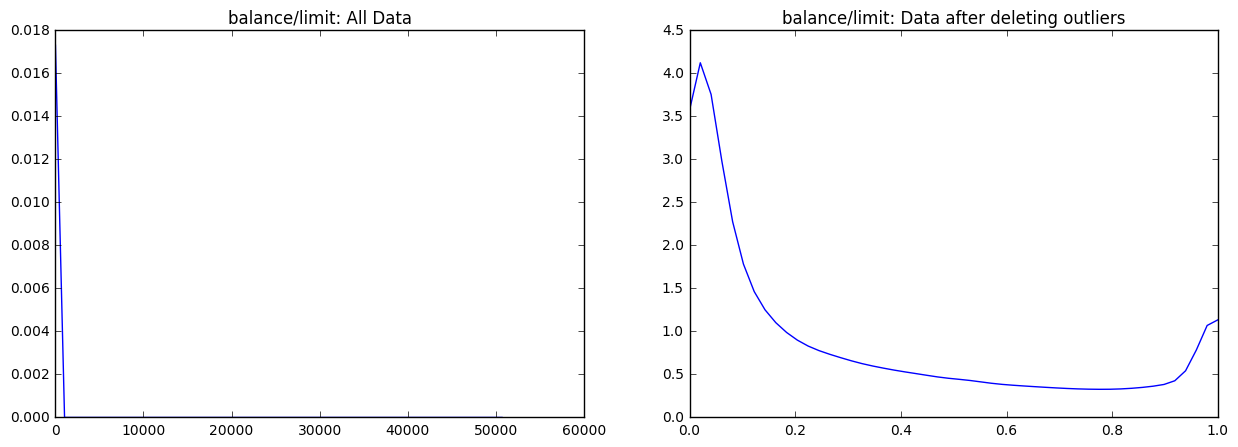

In [11]:
x=df.iloc[:,1] # balance/limit
x=x.dropna()

plt.rcParams['figure.figsize'] = (15,5)
f, (ax1, ax2) = plt.subplots(1, 2)
positions, smoothed = kde_values(x)
ax1.plot(positions, smoothed)
ax1.set_title('balance/limit: All Data')
positions, smoothed = kde_values(x[x<1])
ax2.plot(positions, smoothed)
ax2.set_title('balance/limit: Data after deleting outliers')
plt.show()

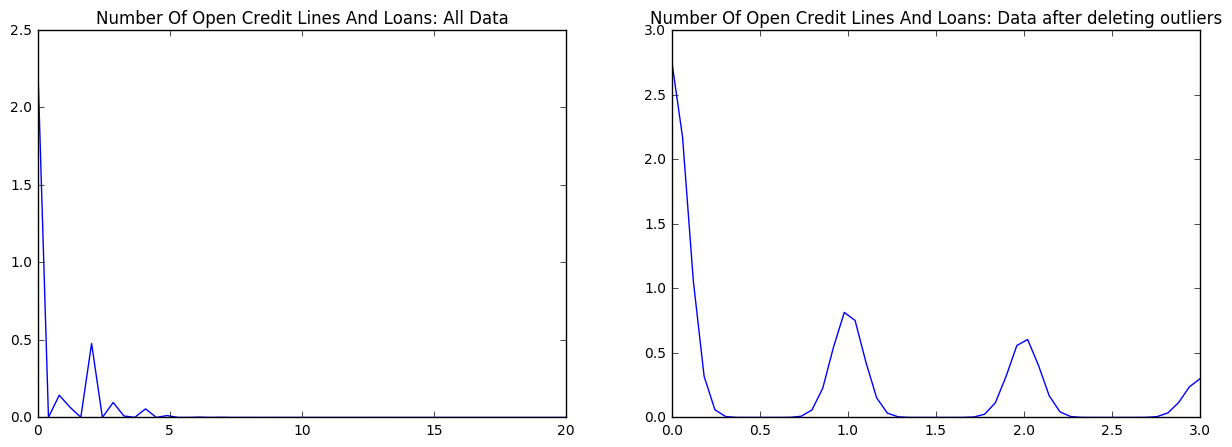

In [12]:
# NumberOfOpenCreditLinesAndLoans
x=df.iloc[:,10]
x=x.dropna()
m=x.quantile(0.99)

plt.rcParams['figure.figsize'] = (15,5)
f, (ax1, ax2) = plt.subplots(1, 2)
positions, smoothed = kde_values(x)
ax1.plot(positions, smoothed)
ax1.set_title('Number Of Open Credit Lines And Loans: All Data')
positions, smoothed = kde_values(x[x<m])
ax2.plot(positions, smoothed)
ax2.set_title('Number Of Open Credit Lines And Loans: Data after deleting outliers')
plt.show()

In [13]:
for col in range(1,11):
    m=df.iloc[:,col].dropna().quantile(0.99)
    df.iloc[:,col]=df.iloc[:,col].map(lambda x: None if x>m else x)

# Preprocessing: 
### 3. Replace the NA value by the mean
Replace all nan values as mean values.

In [14]:
y=df.iloc[:,0].fillna(df.mean()).as_matrix()
x=df.iloc[:,1:].fillna(df.mean()).as_matrix()
print y.shape
print x.shape

# from sklearn import preprocessing
# x = preprocessing.StandardScaler().fit_transform(x)

(150000,)
(150000, 10)


## Feature Engineering 


In [15]:
#df["Household income divided by number of family menmbers"]=df.iloc[:,5]/df.iloc[:,10]

## Model Selection and Results

### 1. XGBoost
### 1.1. Grid Search and Cross Validation

In [16]:
from sklearn import svm, preprocessing, decomposition, grid_search, cross_validation
import xgboost as xgb

model=xgb.XGBClassifier()
tuned_parameters = [{'objective':['binary:logistic'],'n_estimators':[10000], \
                     'learning_rate':[0.10,0.11], 'subsample':[1], 'max_depth':[2,3]}]
cvk = cross_validation.KFold(len(y), n_folds=4)
xgbmodel = grid_search.GridSearchCV(model,tuned_parameters,n_jobs=1,cv=cvk,verbose=1)
xgbmodel.fit(x,y)

/Users/sliM/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/sliM/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed: 114.8min finished


GridSearchCV(cv=sklearn.cross_validation.KFold(n=150000, n_folds=4, shuffle=False, random_state=None),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'objective': ['binary:logistic'], 'n_estimators': [10000], 'learning_rate': [0.1, 0.11], 'max_depth': [2, 3], 'subsample': [1]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

### 1.2 Importance of features

In [17]:
import xgboost as xgb
from sklearn.metrics import r2_score, accuracy_score
params={'objective':'binary:logistic','n_estimators':1000, 'learning_rate':0.1, 'subsample':1, 'max_depth':2}
dtrain = xgb.DMatrix( x, label=y)
bst = xgb.train( params, dtrain, num_boost_round=10000)

yhat=bst.predict(xgb.DMatrix(x))
scores=bst.get_score()
scores

{'f0': 7269,
 'f1': 2373,
 'f2': 612,
 'f3': 9910,
 'f4': 6180,
 'f5': 1454,
 'f6': 605,
 'f7': 490,
 'f8': 515,
 'f9': 421}

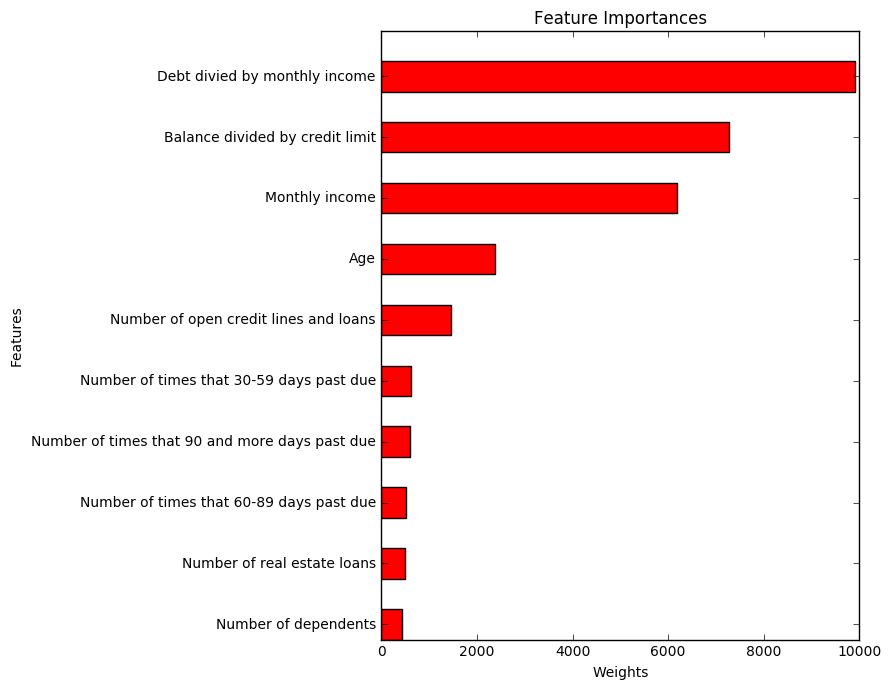

In [18]:
features=np.array([ "Balance divided by credit limit",
                    "Age",
                    "Number of times that 30-59 days past due",
                    "Debt divied by monthly income",
                    "Monthly income",
                    "Number of open credit lines and loans",
                    "Number of times that 90 and more days past due",
                    "Number of real estate loans",
                    "Number of times that 60-89 days past due",
                    "Number of dependents"])
value=scores.values()
ind=sorted(range(len(value)),reverse=False,key=lambda k: value[k])
features=features[ind]
value=sorted(value,reverse=False)
ind=np.array(range(10))
plt.rcParams['figure.figsize'] = (9,7)
plt.barh(bottom=ind,height=0.5,width=value,color='r')
plt.yticks(ind+0.25,features)
plt.xlabel('Weights')
plt.ylabel('Features')
plt.title('Feature Importances')
#plt.subplots_adjust(left=0.2)
plt.tight_layout()
#plt.savefig('feature_importances.png', format='png', dpi=300)
plt.show()

### 1.3 xgboost cross validation 

In [19]:
import xgboost as xgb
params={'objective':'binary:logistic','n_estimators':1000, 'learning_rate':0.1, 'subsample':1, 'max_depth':3}
dtrain = xgb.DMatrix( x, label=y)
num_round = 200
res = xgb.cv(params, dtrain, num_round, nfold=5,
       metrics={'auc'}, seed = 0,
       callbacks=[xgb.callback.print_evaluation(show_stdv=True)])


[0]	train-auc:0.811055+0.00777915	test-auc:0.809171+0.00916474
[1]	train-auc:0.831113+0.00317398	test-auc:0.829907+0.00975085
[2]	train-auc:0.837869+0.00213915	test-auc:0.836634+0.00541289
[3]	train-auc:0.839195+0.0022462	test-auc:0.838194+0.00538272
[4]	train-auc:0.8404+0.00154127	test-auc:0.839601+0.00588891
[5]	train-auc:0.840314+0.00178052	test-auc:0.839365+0.00574149
[6]	train-auc:0.840894+0.00135615	test-auc:0.84018+0.00620073
[7]	train-auc:0.840648+0.00153307	test-auc:0.839784+0.006019
[8]	train-auc:0.840853+0.00150898	test-auc:0.839721+0.00602367
[9]	train-auc:0.841026+0.00134756	test-auc:0.839917+0.00611887
[10]	train-auc:0.841243+0.00188509	test-auc:0.840165+0.00579354
[11]	train-auc:0.842011+0.0016795	test-auc:0.840729+0.00606535
[12]	train-auc:0.842261+0.00137714	test-auc:0.841155+0.00615218
[13]	train-auc:0.84263+0.00134684	test-auc:0.84154+0.00620859
[14]	train-auc:0.842954+0.00133428	test-auc:0.84201+0.00629158
[15]	train-auc:0.84344+0.00140269	test-auc:0.842251+0.006177

## 2. Random forest

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200,max_depth=None)

scores = cross_val_score(clf, x, y, cv=5, scoring='roc_auc')
print scores
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

[ 0.83723236  0.84325588  0.84350871  0.84397201  0.84808941]
Accuracy: 0.84321 (+/- 0.00694)


## 3. Logistic regression

In [23]:
# logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
scores = cross_val_score(clf, x, y, cv=5, scoring='roc_auc')
print scores
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

[ 0.83470957  0.83951947  0.84122624  0.79909177  0.85121854]
Accuracy: 0.83315 (+/- 0.03572)


## 4. KNN

In [24]:
from sklearn import neighbors
n_neighbors = 3
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')

scores = cross_val_score(clf, x, y, cv=5, scoring='roc_auc')
print scores
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

[ 0.54857397  0.55891953  0.54844361  0.55208166  0.54880381]
Accuracy: 0.55136 (+/- 0.00802)


## 5. Neural network

In [25]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
scores = cross_val_score(clf, x, y, cv=5, scoring='roc_auc')
print scores
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

[ 0.5         0.49998214  0.5         0.5         0.5       ]
Accuracy: 0.50000 (+/- 0.00001)


In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
scores = cross_val_score(gnb, x, y, cv=5, scoring='roc_auc')
print scores
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

[ 0.83780085  0.83471062  0.8318199   0.83537535  0.8450321 ]
Accuracy: 0.83695 (+/- 0.00894)


In [26]:
from sklearn.ensemble import VotingClassifier
# xgboost 